In [12]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns; sns.set()

 # [gyro_x, gyro_y, gyro_z, accel_x, accel_y, accel_z]

In [31]:
wave_data = []
wave_data.append(pd.read_csv('./swipe/data_5_np.csv'))
wave_data[0]




,7.208252000000000237e+01,7.934569999999999901e+00,3.601074000000000108e+00,7.006835999999999620e-02,3.541382000000000030e+00,9.033203000000000066e-03
0,23.92578,-59.63134,-242.0044,0.572632,3.257080,0.405396
1,73.30322,-61.52343,-338.9892,1.249268,2.203369,0.979614
2,71.04492,-67.62695,-389.4653,1.923340,1.685547,1.830688
3,53.10058,-50.04882,-428.9550,2.328613,1.266357,2.402222
4,131.22560,14.83154,-442.9931,2.473267,0.849243,2.567383
...,...,...,...,...,...,...
283,96.49657,50.35400,-471.0083,2.235718,0.338257,1.825073
284,69.70215,49.62158,-462.1582,2.227295,0.013062,1.646240
285,68.17627,63.78173,-449.9511,2.199219,-0.228516,1.629883
286,30.51758,64.20898,-444.7021,2.228027,-0.724976,1.277710


In [32]:
gyro_x = wave_data[0].iloc[:, 0].values
gyro_y = wave_data[0].iloc[:, 1].values
gyro_z = wave_data[0].iloc[:, 2].values
accel_x = wave_data[0].iloc[:, 3].values
accel_y = wave_data[0].iloc[:, 4].values
accel_z = wave_data[0].iloc[:, 5].values


def check_data_pattern(d):
    x = np.linspace(0, len(d), len(d))
    y = d

    plt.plot(x, y, 'o', color='red')


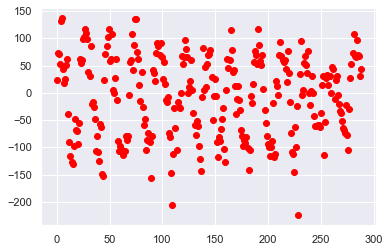

In [33]:
check_data_pattern(gyro_x)

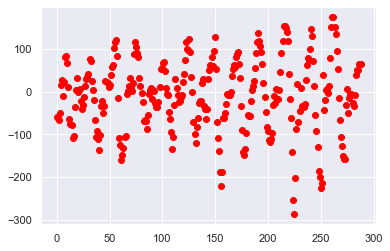

In [34]:
check_data_pattern(gyro_y)

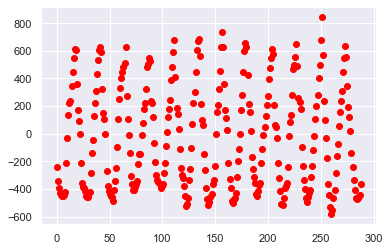

In [35]:
check_data_pattern(gyro_z)

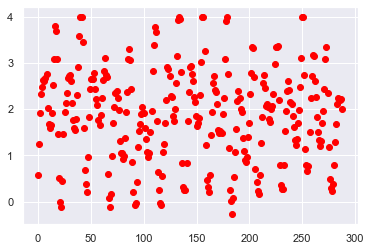

In [36]:
check_data_pattern(accel_x)

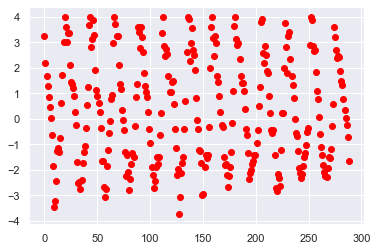

In [37]:
check_data_pattern(accel_y)

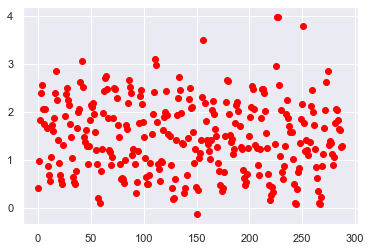

In [38]:
check_data_pattern(accel_z)

In [30]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


def train_model(vertical_swipe, horizontal_swish):
     vertical_swipe   = np.asarray(vertical_swipe)
     horizontal_swish = np.asarray(horizontal_swish)
     X = np.append(vertical_swipe, horizontal_swish, axis=0)
     y = np.append(np.zeros(vertical_swipe.shape[0]), np.ones(horizontal_swish.shape[0]))
     model = KNeighborsClassifier(n_neighbors=15)
     model.fit(X,y)
     
     return model; 

def predict_model(model,data):
     data = np.array(data)
     if np.any(np.isnan(data)) or np.any(np.isinf(data)):
          return 0
     return model.predict(data.reshape(1,-1))[0]

def run_training_and_prediction(vertical_swipe, horizontal_swish, data):
     model = train_model(vertical_swipe, horizontal_swish)
     return predict_model(model, data)